# Data Collection

In [ ]:
import pandas as pd

In [ ]:
# Reading the file using pandas
data=pd.read_excel("StoresData.xlsx")
# Display the first 5 rows of data
print (data.head())

In [ ]:
# Check columns
print(data.columns)

# Data Cleaning

In [ ]:
# Basic info about the dataset
print(data.info())

In [ ]:
print(data.isnull().sum())

In [ ]:
# Basic stats for numeric columns
print(data.describe())

In [ ]:
#sum duplicated
print(data.duplicated().sum())

In [ ]:
data.dtypes

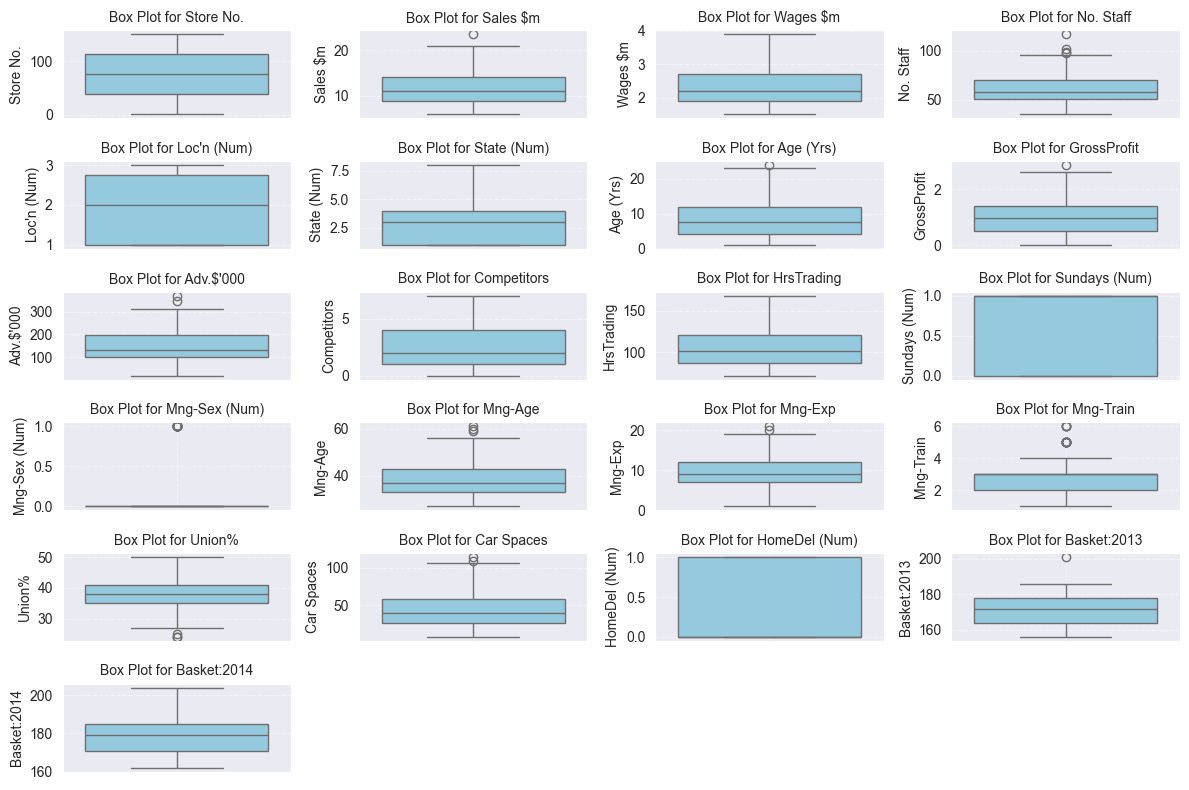

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of columns (let's use a fixed number of columns, for example, 4)
num_cols = 4

# Get a list of all numeric columns from your DataFrame
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed for the subplot layout
num_rows = (len(numerical_columns) // num_cols) + (1 if len(numerical_columns) % num_cols != 0 else 0)

# Set the figure size for the plots
plt.figure(figsize=(12, 8))

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Define position in the subplot grid
    sns.boxplot(y=data[col], color='skyblue')  # Create a vertical box plot for the column
    plt.title(f'Box Plot for {col}', fontsize=10)  # Title for each plot
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Ensure the plots don't overlap
sns.set_style("darkgrid")
plt.show()  # Display all the plots

In [ ]:
# Calculate the first (Q1) and third (Q3) quartiles for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)

# Define the acceptable data limits (within 1.5 times the IQR)
filtered_df = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the cleaned data (after removing outliers)
print(filtered_df)

In [ ]:
# Display summary statistics of the cleaned data to ensure proper cleaning
print(filtered_df.describe())

In [ ]:
# Get all numeric columns (int and float types)
numerical_columns = filtered_df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column to remove outliers individually
for col in numerical_columns:
    Q1 = filtered_df[col].quantile(0.25)         # First quartile (25th percentile)
    Q3 = filtered_df[col].quantile(0.75)         # Third quartile (75th percentile)
    IQR = Q3 - Q1                                # Interquartile Range (IQR)

    # Define the lower and upper bounds for non-outlier data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows where the column value is within the normal range
    df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]
df    

# Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler()

# Select only the numerical columns from the DataFrame
numerical_columns =df.select_dtypes(include=['number']).columns

# Apply MinMax scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the normalized DataFrame to a CSV file
df.to_csv('scaled_data_normalized.csv', index=False)

# Display the first 5 rows of the scaled DataFrame
print(df.head())